In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import scipy

In [16]:
# Cough audio loading
cough_audio = './cough-audio-4.wav'
data, sample_rate = librosa.load(cough_audio)

# Audio duration
duration = librosa.get_duration(path = cough_audio)
time = np.arange(0, len(data)) / sample_rate

print("Audio Duration: {}".format(duration))
print("Sample Rate: {}".format(sample_rate))

Audio Duration: 6.058666666666666
Sample Rate: 22050


In [17]:
# Data normalization
mean = np.mean(data)
std = np.std(data)

data = (data - mean) / std

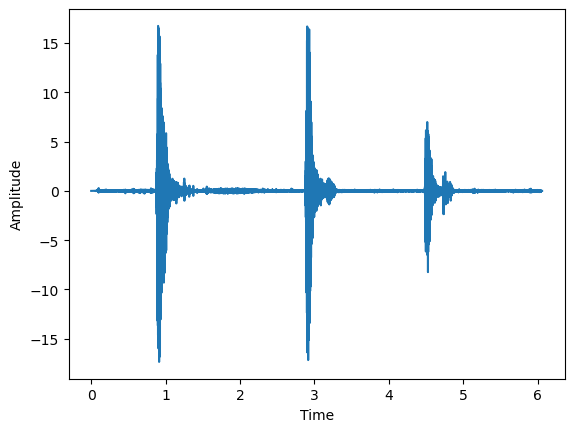

In [18]:
# Data graph

plt.plot(time, data)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [19]:
# Moving Average of the Data:
def moving_average(data, window_size):
    
    moving_averages = []

    i = 0
    while i < len(data) - window_size + 1:
        
        window = data[i : i + window_size]
        window_average = round(sum(window) / window_size, 2)
        moving_averages.append(window_average)

        i += 1    
    
    return np.array(moving_averages)

In [24]:
formatted_data = moving_average(np.abs(data),51)

The shape of spectrogram: (1025, 261)


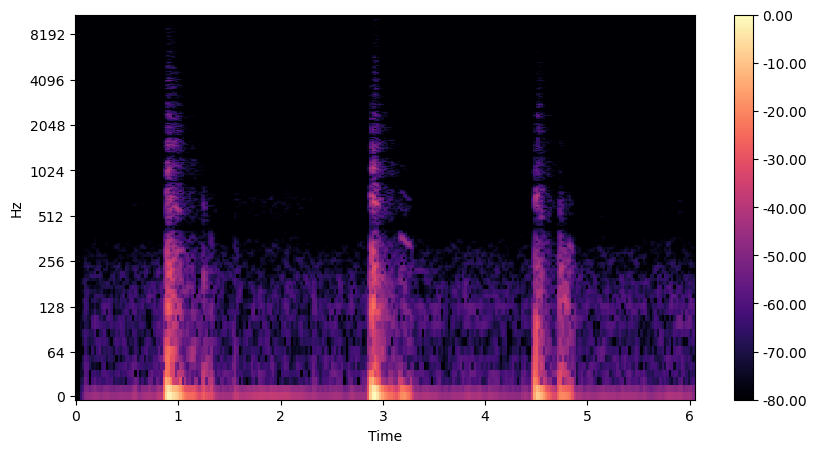

In [26]:
# Spectogram
D = librosa.stft(formatted_data)
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)

print("The shape of spectrogram: {}".format(S_db.shape))

fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db,
                              x_axis="time",
                              y_axis="log",
                              ax=ax)

fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()